In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/ezioauditore-tech/AI/main/datasets/Mall_Customers.csv')

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.shape

(200, 5)

In [ ]:
x=df.iloc[:,[3,4]].values
x

In [ ]:
from sklearn.cluster import KMeans
c=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(x)
  c.append(kmeans.inertia_)

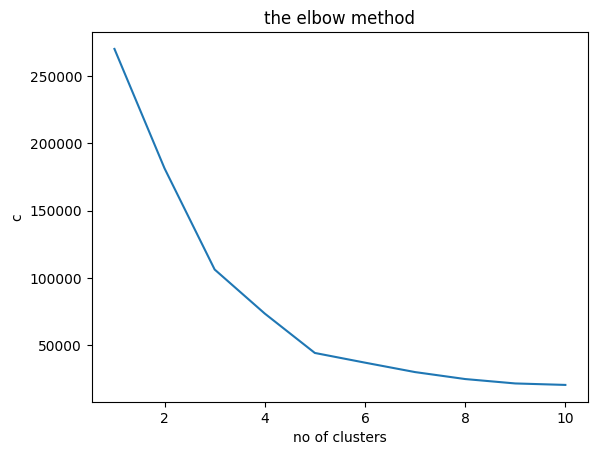

In [ ]:
#elbow correctly plots at k=5(wich denotes no_of_clusters)
plt.plot(range(1,11),c)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('c')
plt.show()

In [ ]:
kmeansmodel = KMeans(n_clusters=5,init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(x)

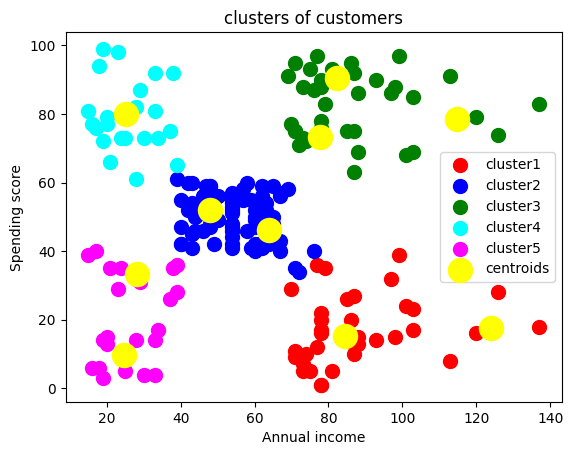

In [ ]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100 , c='red', label='cluster1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1] , s=100, c='blue', label='cluster2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100, c='green', label='cluster3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s=100, c='cyan', label='cluster4')
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s=100, c='magenta', label='cluster5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='centroids')
plt.title('clusters of customers')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.legend()
plt.show()